In [1]:
import cv2

## parameters

In [2]:
!wget -nc -P /tmp/ https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb

File ‘/tmp/EDSR_x2.pb’ already there; not retrieving.



In [3]:
scale           = 2;
weights_file    = "/tmp/EDSR_x%d.pb" % scale;
image_file      = "../example_image.png"

## images

In [4]:
original = cv2.imread(image_file);
if (original is None):
    raise RuntimeError("Can't open image.")

downscaled = cv2.resize(original, dsize=None, fx=1/scale, fy=1/scale);

## model

In [5]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

sr.readModel(weights_file)
sr.setModel("edsr", scale)

In [6]:
result = sr.upsample(downscaled)
resized = cv2.resize(downscaled, dsize=None, fx=scale, fy=scale)

In [7]:
import matplotlib.pyplot as plt

In [8]:
#https://stackoverflow.com/a/42314798
def display_image_in_actual_size(im_data):
    dpi = 80
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

### original

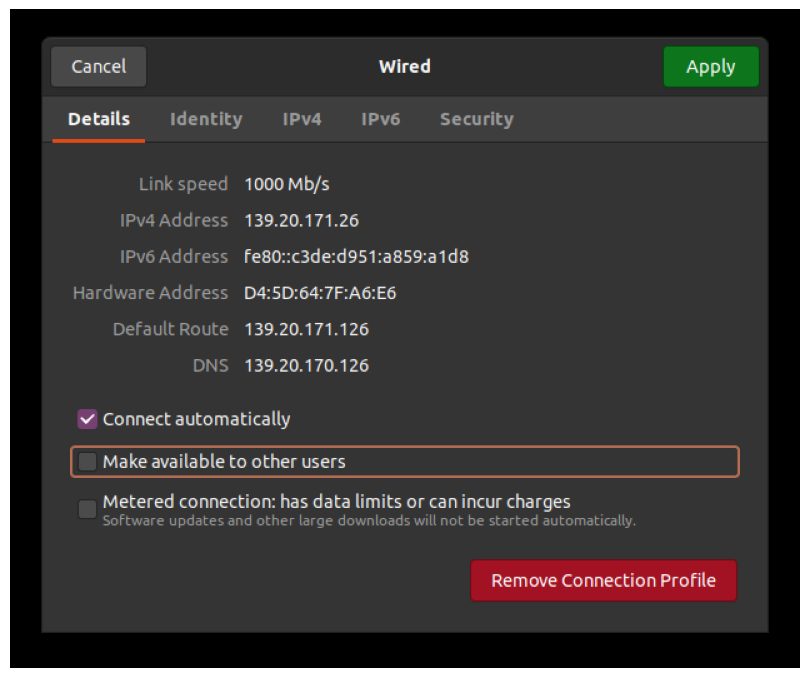

In [9]:
# Original image
display_image_in_actual_size(original[:, :, ::-1]);

### sr upscaled

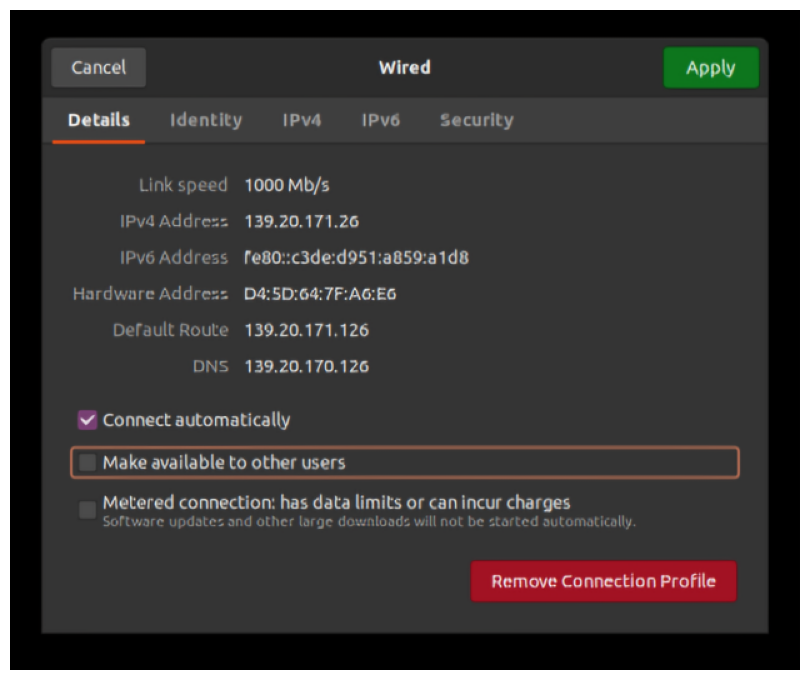

In [10]:
# SR upscaled
display_image_in_actual_size(result[:, :, ::-1]);

### opencv upscaled

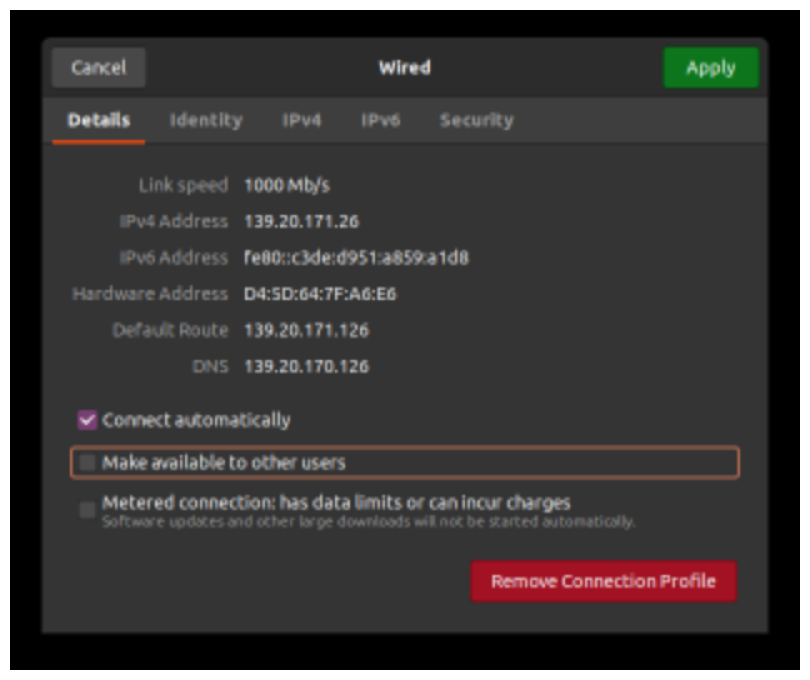

In [11]:
# OpenCV upscaled
display_image_in_actual_size(resized[:, :, ::-1]);